In [1]:
import os
import sys
import dask
import uproot4
import numpy as np
import pandas as pd
from hist import Hist
import hist
import uproot4 as uproot
from dask.array import histogram as ds_hist
import dask.dataframe as dd
import timeit
from dask.distributed import Client
import storage_functions as sf
import time
import psutil
##procedurre to make client dask work
# read hdf data convert it to csv and save it, then read csv with dask data frame
# or just reset index and then go from there
# 2tb of data run 2gb per job each job takes half a day
# try load pickle create new files
import re
import subprocess
from pympler import asizeof

In [2]:
Hist(hist.axis.Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'))

Hist(Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'), storage=Double())

In [3]:
sf.Histogram_wrapper(hist.axis.Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'))

Histogram_wrapper(Regular(20, 300000, 600000), storage=Double())

In [4]:
rootdir = "/Skl_Data/"


In [5]:
os.walk(rootdir)

<generator object walk at 0x7f7a050db5c8>

In [6]:
full_path = str(subprocess.check_output(['pwd']))
path = str(subprocess.check_output(['pwd']))[2:len(full_path)-3]

In [7]:
full_path

"b'/afs/cern.ch/user/k/kmalirz/pythium\\n'"

In [8]:
os.listdir(path+rootdir)

['.ipynb_checkpoints', 'test12345.h5']

In [9]:
regex = re.compile('(?=^[^.].)(.*h5$)|(?=^[^.].)(.*csv$)')
directory_check = re.compile('(?=^[^.].)')
#print(rootdir)
file_names = []
for root, dirs, files in os.walk(path+rootdir,topdown = True):
    dirs[:] = [d for d in dirs if directory_check.match(d)]
    for file in files:
        if regex.match(file):
            file_names.append(root+file)

In [10]:
file_names

['/afs/cern.ch/user/k/kmalirz/pythium/Skl_Data/test12345.h5']

In [11]:
h_names = []
file_names = []
temp = pd.read_hdf("Skl_Data/test12345.h5")

In [12]:
list(temp.columns)

['leptons_pt', 'jets_pt', 'weight_mc', 'runNumber', 'BDT']

In [13]:
%%time
x = []
for i in range(0,50):
    x.append(temp)

CPU times: user 13 µs, sys: 6 µs, total: 19 µs
Wall time: 23.1 µs


In [14]:
%%time
temp = pd.concat(x,ignore_index=False,sort = False)

CPU times: user 402 ms, sys: 888 ms, total: 1.29 s
Wall time: 1.27 s


In [15]:
%%time
for i in range(0,8):
    h_names.append(f"h{i}")
    file_names.append(f"test{i}.h5")
    #if os.path.isfile(f"/eos/user/k/kmalirz/test{i}.pkl"): os.remove(f"/eos/user/k/kmalirz/test{i}.pkl")
    #if os.path.isfile(f"/eos/user/k/kmalirz/test{i}.h5"): os.remove(f"/eos/user/k/kmalirz/test{i}.h5")
    #temp.to_hdf(f"/eos/user/k/kmalirz/test{i}.h5", key='branches')
    #temp.to_pickle(f"/eos/user/k/kmalirz/test{i}.pkl")

CPU times: user 9 µs, sys: 7 µs, total: 16 µs
Wall time: 19.1 µs


In [16]:
file_names

['test0.h5',
 'test1.h5',
 'test2.h5',
 'test3.h5',
 'test4.h5',
 'test5.h5',
 'test6.h5',
 'test7.h5']

In [17]:
histogramming = sf.HistoMaker()

In [18]:
client = histogramming.client_start(n_workers = 8,memory_limit='2GB',threads_per_worker=1)

In [19]:
client

Client Scheduler: tcp://127.0.0.1:44893 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 8 Memory: 16.00 GB


In [20]:

len(x)

50

In [21]:

x = histogramming.create_file_list(top_directory = '/eos/atlas/atlascerngroupdisk/perf-jets/JSS/WTopBackgroundSF2019/UFO_test/slimmed_SEP_v1/')

In [22]:
data = histogramming.load_pkl(x[0])

In [23]:
histogramming.histogram_variables

{'rljet_pt_comb': Regular(20, 300000, 600000, name='x', label='$p_{T}$[MeV]'),
 'rljet_m_comb[:,0]': Regular(20, 50000, 500000, name='x', label='m [MeV]'),
 'rljet_Angularity': Regular(20, 0, 0.1, name='x', label='Angularity'),
 'rljet_Aplanarity': Regular(20, 0, 1, name='x', label='Aplanarity'),
 'rljet_C2': Regular(20, 0, 1, name='x', label='$C_{2}$'),
 'rljet_D2': Regular(20, 0, 6, name='x', label='$D_{2}$'),
 'rljet_Dip12': Regular(20, 0, 2, name='x', label='Dip12'),
 'rljet_ECF1': Regular(20, 0, 1e+07, name='x', label='ECF$_{1}$'),
 'rljet_ECF2': Regular(20, 0, 1e+12, name='x', label='ECF$_{2}$'),
 'rljet_ECF3': Regular(20, 0, 1e+17, name='x', label='ECF$_{3}$'),
 'rljet_FoxWolfram0': Regular(20, 0, 1, name='x', label='FoxWolfram0'),
 'rljet_FoxWolfram2': Regular(20, 0, 1, name='x', label='FoxWolfram2'),
 'rljet_KtDR': Regular(20, 0, 6, name='x', label='KtDR'),
 'rljet_Mu12': Regular(20, 0, 1, name='x', label='Mu12'),
 'rljet_L1': Regular(20, 0, 1, name='x', label='$L_{1}$'),
 'rl

In [24]:
output = dask.compute(histogramming.fill(data,histogramming.histogram_variables))

In [25]:
output[0][4]

Hist(Regular(20, 0, 1, name='x', label='$L_{1}$'), storage=Double()) # Sum: 27047.0

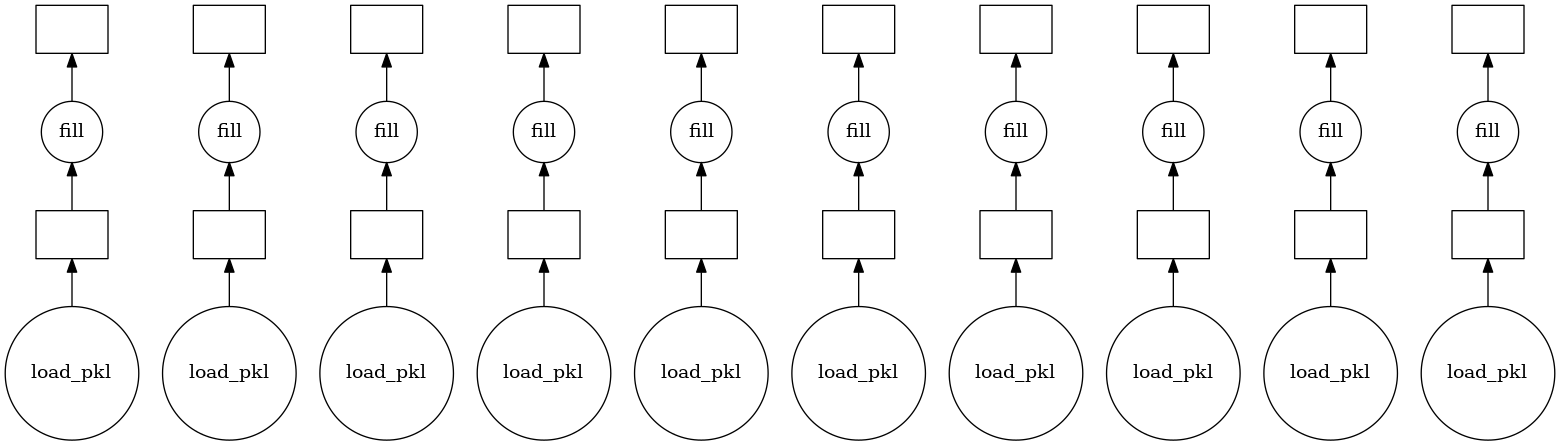

In [26]:
dask.visualize(histogramming.load_and_fill(file_list = x[:10]))

In [27]:
temp = pd.read_pickle(x[2000])

In [28]:
temp

,,rljet_L4,rljet_L5,rljet_L2,rljet_topTag_DNN20_TausRatio_inclusive_score,rljet_topTag_DNN20_TausRatio_qqb_score,rljet_pt_comb,rljet_M2,rljet_L3,rljet_L1,rljet_topTag_DNN20_qqb_score,rljet_topTag_DNN19_qqb_score,rljet_topTag_DNN19_inclusive_score,rljet_D2,rljet_N3,rljet_N2,rljet_topTag_DNN20_inclusive_score,rljet_ungroomed_ntrk500,"rljet_m_comb[:,0]"
entry,subentry,,,,,,,,,,,,,,,,,,
0,0,1.478220,0.173853,0.142326,0.233609,0.028133,234297.921875,0.058569,0.049985,0.052006,0.008996,0.144268,0.305211,1.608747,2.194288,0.261934,0.318813,25,77868.570312
1,0,1.159872,0.182679,0.198222,0.065824,0.028205,533714.125000,0.098365,0.097097,0.096210,0.039847,0.186804,0.116970,1.039699,1.467166,0.290440,0.073059,53,256805.593750
2,0,1.424379,0.212927,0.246536,0.084335,0.009025,234563.500000,0.091785,0.067575,0.079675,0.009816,0.098301,0.111656,2.505868,1.881467,0.373857,0.062968,19,77142.257812
3,0,1.553125,0.290454,0.179543,0.515852,0.180849,237934.281250,0.078671,0.072736,0.074003,0.074075,0.298814,0.515191,1.265350,1.748846,0.272025,0.525609,19,97159.187500
4,0,1.127484,0.339977,0.298020,0.384343,0.175337,257513.250000,0.152028,0.136176,0.135310,0.660136,0.783664,0.736589,1.391467,1.362434,0.377992,0.562129,40,169429.921875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0,1.242116,0.224202,0.217022,0.134496,0.031480,272262.781250,0.098071,0.081542,0.085398,0.033329,0.242306,0.195403,1.739679,1.758764,0.342052,0.169166,22,113011.375000
5555,0,1.908339,0.368705,0.236607,0.146140,0.021759,210497.765625,0.071563,0.049858,0.069407,0.052708,0.084438,0.040196,2.957101,2.540267,0.373789,0.456937,22,68926.210938
5556,0,1.231826,0.254990,0.271303,0.090766,0.011847,224611.203125,0.110704,0.089852,0.102500,0.011317,0.026447,0.075495,1.870320,1.654624,0.371276,0.065832,22,56957.425781


In [29]:
#%%time
#temp = dask.compute(histogramming.load_and_fill(data_column = 'rljet_pt_comb',file_list = x[:200]))

In [30]:
%%time
xxxxx = histogramming.compute_histograms(chunk_size = 150,file_list = x[:])

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


KeyboardInterrupt: 

distributed.nanny - WARNING - Restarting worker


In [31]:
len(xxxxx)

NameError: name 'xxxxx' is not defined

In [ ]:
xxxxx[100]

In [ ]:
xxxxx[2000]

In [ ]:
#dask.visualize(histogramming.load_and_fill(data_column = 'rljet_pt_comb',file_list = x[:4]))

In [ ]:
asizeof.asizeof(temp)/1024**2

In [ ]:
psutil.virtual_memory().percent

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
